Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 




## Model Selection using RFE (Bike Sharing System)

### Importing and Understanding Data

### Step 1: Importing Data

In [5]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Import necessary libraries

import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
# Importing day.csv
# Read the CSV file "day.csv" into a Pandas DataFrame named 'df'
df_bike = pd.read_csv('day.csv')

In [8]:
# Looking at the first five rows
df_bike.head()
df_bike.shape

(730, 16)

In [9]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
#checking for null values in dataset
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Step 2: Data Preparation

In [12]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df_bike.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
90%,657.100000,4.000000,1.000000,11.000000,0.000000,6.000000,1.000000,2.000000,29.998347,33.908210,81.762500,19.833997,1872.000000,5895.400000,7293.800000
95%,693.550000,4.000000,1.000000,12.000000,0.000000,6.000000,1.000000,2.000000,31.520460,35.749975,86.868735,22.999988,2355.000000,6280.550000,7576.400000
99%,722.710000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,33.868050,38.941650,92.795857,27.380948,2931.680000,6787.390000,8163.810000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

### 1. Instant: Indicates row number, not required

In [16]:
df_bike.drop("instant",inplace=True,axis=1)

In [17]:

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [18]:
df_bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


According to the problem statement, the dependent variable we should focus on is the total number of bike rentals, which is represented by the ‘cnt’ variable. 
The statement mentions:
casual
registered
Target variable cnt is addition of casual and registered. so we are dropping casual and registered

In [20]:
df_bike.drop(columns=["casual","registered"],axis=1,inplace=True)

In [21]:
df_bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


dteday , yr & month represent the same value. so dropping dteday

In [24]:
df_bike.drop("dteday",axis=1,inplace=True)

In [25]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
df_bike.info()
df_bike.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


(730, 12)

## Checking the Correlation

In [28]:
df_bike[["weathersit","temp","atemp","hum","windspeed","cnt"]].corr()

,weathersit,temp,atemp,hum,windspeed,cnt
weathersit,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,0.039769,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,-0.295929,0.627044,0.630685,-0.098543,-0.235132,1.000000


<Axes: >

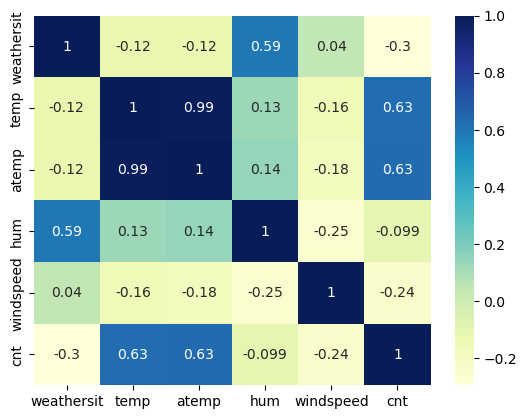

In [29]:
sns.heatmap(df_bike[["weathersit","temp","atemp","hum","windspeed","cnt"]].corr(),cmap="YlGnBu",annot=True)

When the correlation between two features is close to 1 (positive correlation) or -1 (negative correlation), it indicates that the features are highly similar, meaning that they provide almost the same information to the model. Dropping one of these highly correlated features is advisable for several reasons:

1. **Multicollinearity**: 
   - High correlation between features leads to multicollinearity, which can cause instability in the regression coefficients. This makes it difficult to determine the individual effect of each feature on the dependent variable, as the model struggles to differentiate their contributions.

2. **Model Simplification**:
   - By removing redundant features, you simplify the model, making it easier to interpret and reducing the risk of overfitting. A simpler model with fewer features is usually more generalizable to unseen data.

3. **Improved Computational Efficiency**:
   - Reducing the number of features can decrease the computational cost and memory requirements, leading to faster model training and prediction times. This is particularly important when dealing with large datasets or complex models.

4. **Avoiding Overfitting**:
   - Highly correlated features can contribute to overfitting, as the model may become too finely tuned to the training data. Dropping one of these features helps the model generalize better to new data.

5. **Better Predictor Stability**:
   - With high multicollinearity, small changes in the data can lead to large changes in the model coefficients, making the model unstable. By dropping one of the highly correlated features, you increase the stability of the predictors.

In summary, when two features are highly correlated, removing one of them can lead to a more stable, interpretable, and efficient model with better generalization to new data.


**So we are dropping the column _atemp_**

In [32]:
df_bike.drop("atemp",axis=1,inplace=True)

In [33]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


### Modifying numerical variable as  Categorical variable as per the Data Dictionary for Data Visualization

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [36]:
#df_bike.yr=df_bike.yr.map({0:2018,1:2019})
df_bike.mnth= df_bike.mnth.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
df_bike.weekday = df_bike.weekday.map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df_bike.weathersit = df_bike.weathersit.map({1: 'Clear',2: 'Cloudy_mist',3: 'Light_Rain_Thunder',4: 'Heavy_Rain_thunder'})
df_bike.season = df_bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df_bike.holiday = df_bike.holiday.map({0:'holiday', 1:'workingday'})
df_bike.workingday = df_bike.workingday.map({1:'workingday', 0:'holiday'})

In [37]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,holiday,Saturday,holiday,Cloudy_mist,14.110847,80.5833,10.749882,985
1,spring,0,January,holiday,Sunday,holiday,Cloudy_mist,14.902598,69.6087,16.652113,801
2,spring,0,January,holiday,Monday,workingday,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,holiday,Tuesday,workingday,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,holiday,Wednesday,workingday,Clear,9.305237,43.6957,12.522300,1600


### Data Visualization using Categorical variables against count of total rental bikes

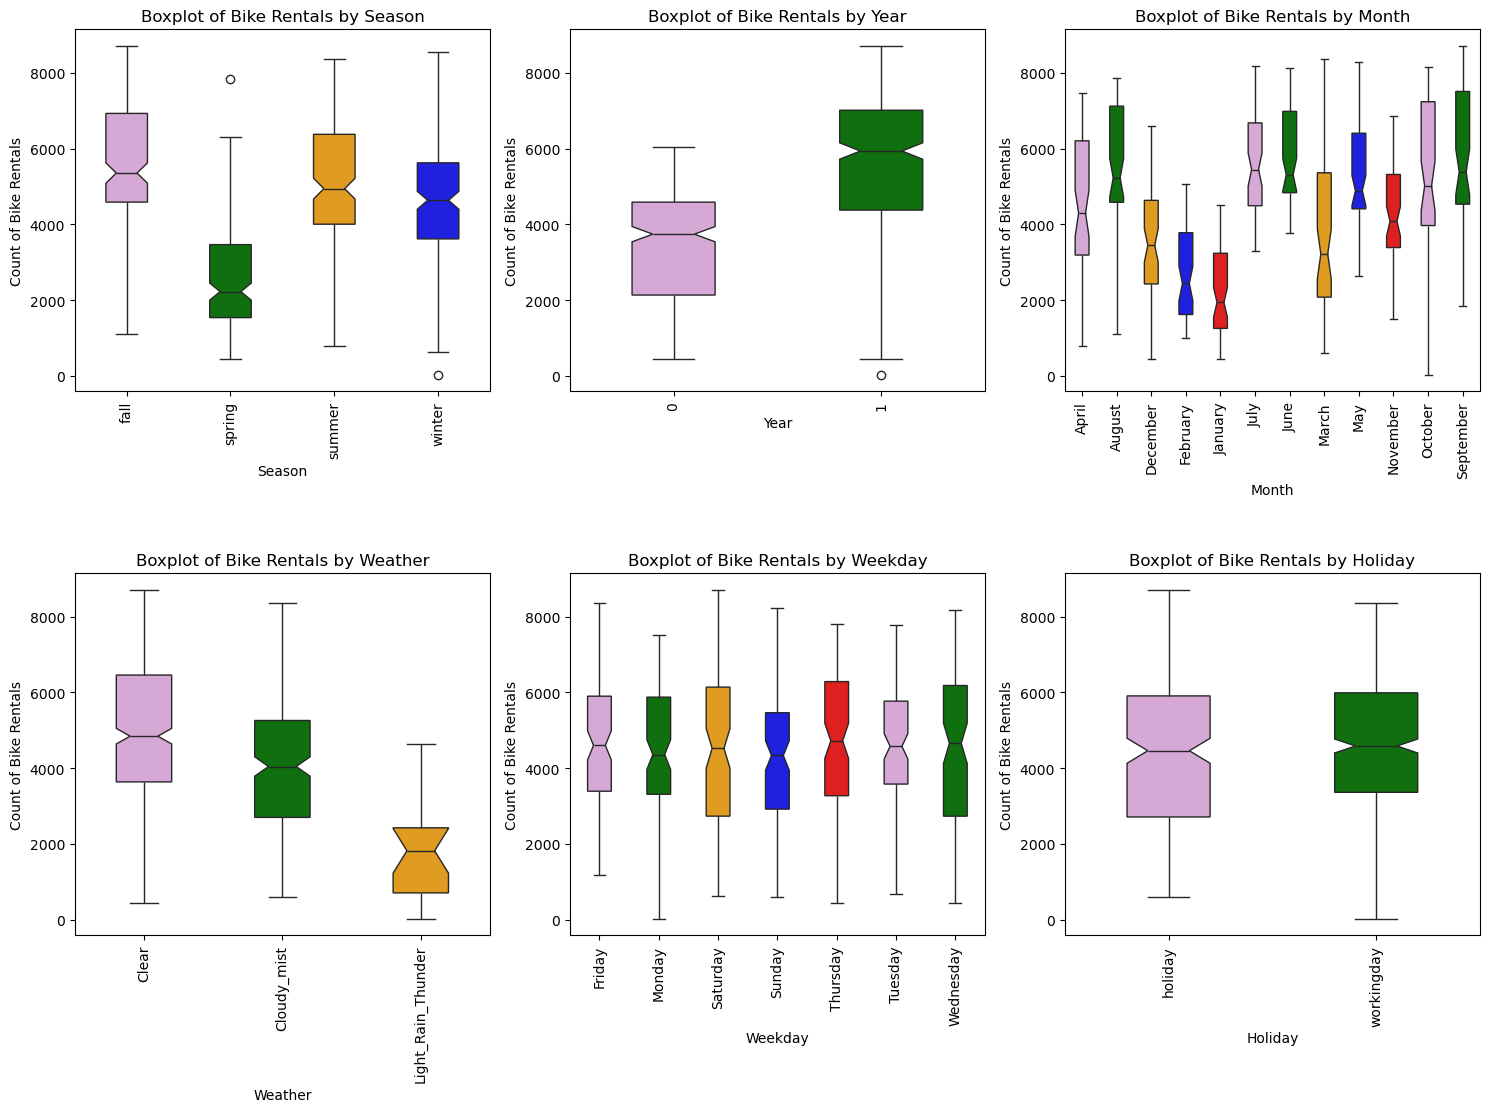

In [39]:
categorical_variable=["season","yr","mnth","weathersit","weekday","workingday"]
boxplot_title=["Season","Year","Month","Weather","Weekday","Holiday"]

plt.figure(figsize=(15,15))
for i, categorical_variable in enumerate(categorical_variable, 1):
    plt.subplot(3, 3, i)
    df_boxplot = df_bike[['cnt', categorical_variable]].copy()
    df_boxplot[categorical_variable] = df_bike[categorical_variable].astype('category')
    
    sns.boxplot(x=categorical_variable, y='cnt', data=df_boxplot, width=0.4,notch=True, patch_artist=True,palette = ['plum', 'g', 'orange', 'b', 'r'])
    plt.title(f'Boxplot of Bike Rentals by {boxplot_title[i-1]}')
    plt.xlabel(boxplot_title[i-1])
    plt.ylabel('Count of Bike Rentals')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Categorical Values Box Plot Analysis

1. **Season**: 
   - Fall having higher rental range where spring having less renatl range.

2. **Year**:
   - 2019 Rental of bike considerably increased compare to 2018.

3. **Month**:
   - September leads in monthly rental counts, with nearby months also showing strong demand. This trend follows seasonal patterns, suggesting a link between rentals and seasons.

4. **Weather**:
   - Rental having higher value during Clear weather than cloudy mist and light rain thunder.

5. **WeekDay**:
   - Saturday and Thursday more rental than other working days.

6. **HoliDay**:
   - Holiday rented less than working days.


## Outliers removal

In [42]:
# Select rows from DataFrame 'df' where the season is "Spring" and cnt is greater than 7000
df_filtered = df_bike[(df_bike['season'] == 'spring') & (df_bike['cnt'] > 7000)]

In [43]:
df_filtered.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
440,spring,1,March,holiday,Saturday,holiday,Cloudy_mist,21.080847,75.5833,7.417168,7836


In [44]:
df_bike.drop(df_bike[(df_bike.season == "spring") & (df_bike.cnt > 7000)].index,inplace=True,axis=0)

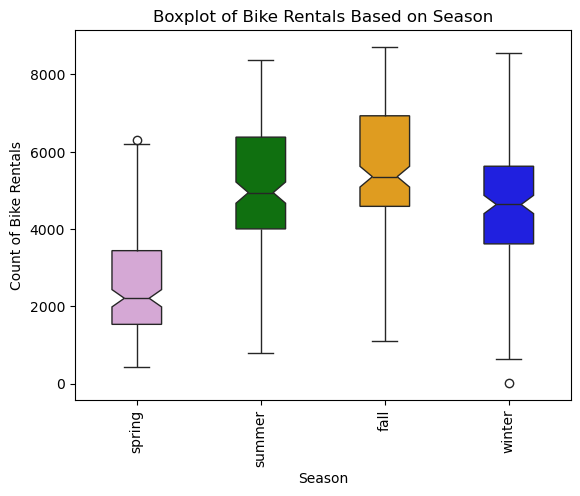

In [45]:
    sns.boxplot(x=df_bike.season, y='cnt', data=df_bike, width=0.4,notch=True, patch_artist=True,palette = ['plum', 'g', 'orange', 'b'])
    plt.title(f'Boxplot of Bike Rentals Based on Season')
    plt.xlabel('Season')
    plt.ylabel('Count of Bike Rentals')
    plt.xticks(rotation=90)
    plt.show()

## Checking the Correlation with categorical variables

In [47]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      729 non-null    object 
 1   yr          729 non-null    int64  
 2   mnth        729 non-null    object 
 3   holiday     729 non-null    object 
 4   weekday     729 non-null    object 
 5   workingday  729 non-null    object 
 6   weathersit  729 non-null    object 
 7   temp        729 non-null    float64
 8   hum         729 non-null    float64
 9   windspeed   729 non-null    float64
 10  cnt         729 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 68.3+ KB


In [48]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,holiday,Saturday,holiday,Cloudy_mist,14.110847,80.5833,10.749882,985
1,spring,0,January,holiday,Sunday,holiday,Cloudy_mist,14.902598,69.6087,16.652113,801
2,spring,0,January,holiday,Monday,workingday,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,holiday,Tuesday,workingday,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,holiday,Wednesday,workingday,Clear,9.305237,43.6957,12.522300,1600


In [49]:
df_bike[["yr","temp","hum","windspeed","cnt"]].corr()

,yr,temp,hum,windspeed,cnt
yr,1.000000,0.048684,-0.113925,-0.010226,0.568914
temp,0.048684,1.000000,0.128512,-0.158159,0.628085
hum,-0.113925,0.128512,1.000000,-0.247551,-0.100930
windspeed,-0.010226,-0.158159,-0.247551,1.000000,-0.233346
cnt,0.568914,0.628085,-0.100930,-0.233346,1.000000


<Axes: >

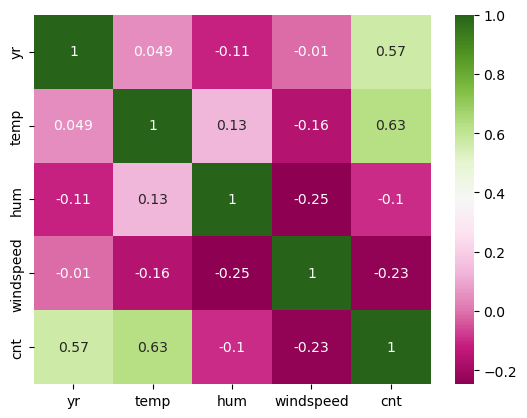

In [50]:
sns.heatmap(df_bike[["yr","temp","hum","windspeed","cnt"]].corr(),cmap="PiYG",annot=True)

## *_Highest correlation with cnt is seen in temp._*

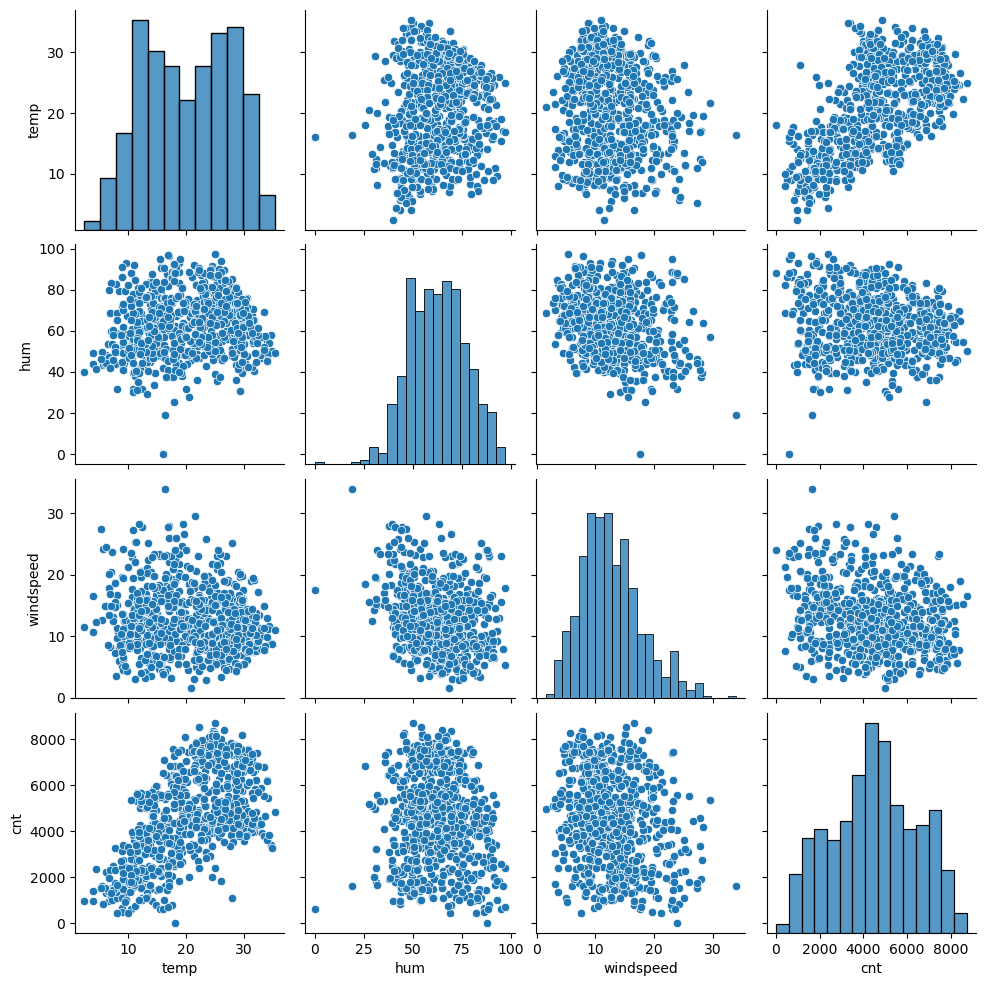

In [52]:
sns.pairplot(df_bike,vars=["temp","hum","windspeed","cnt"])

### Dummy Variables Creation

In [54]:
season_dummy=pd.get_dummies(df_bike["season"])
season_dummy.head()
df_bike["season"].value_counts()
season_dummy=pd.get_dummies(df_bike["season"],drop_first=True)
season_dummy = season_dummy.astype(int)
season_dummy.head()
df_bike=pd.concat([df_bike,season_dummy],axis=1)
season_dummy.head()
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,January,holiday,Saturday,holiday,Cloudy_mist,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,January,holiday,Sunday,holiday,Cloudy_mist,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,January,holiday,Monday,workingday,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,January,holiday,Tuesday,workingday,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,January,holiday,Wednesday,workingday,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [55]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,January,holiday,Saturday,holiday,Cloudy_mist,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,January,holiday,Sunday,holiday,Cloudy_mist,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,January,holiday,Monday,workingday,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,January,holiday,Tuesday,workingday,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,January,holiday,Wednesday,workingday,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [56]:
mnth_dummy=pd.get_dummies(df_bike["mnth"])
mnth_dummy.head()
df_bike["mnth"].value_counts()
mnth_dummy=pd.get_dummies(df_bike["mnth"],drop_first=True)
mnth_dummy = mnth_dummy.astype(int)
mnth_dummy.head()
df_bike=pd.concat([df_bike,mnth_dummy],axis=1)
mnth_dummy.head()
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,December,February,January,July,June,March,May,November,October,September
0,spring,0,January,holiday,Saturday,holiday,Cloudy_mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,January,holiday,Sunday,holiday,Cloudy_mist,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,January,holiday,Monday,workingday,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,holiday,Tuesday,workingday,Clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,January,holiday,Wednesday,workingday,Clear,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [57]:
weekday_dummy=pd.get_dummies(df_bike["weekday"])
weekday_dummy.head()
df_bike["weekday"].value_counts()
weekday_dummy=pd.get_dummies(df_bike["weekday"],drop_first=True)
weekday_dummy = weekday_dummy.astype(int)
weekday_dummy.head()
df_bike=pd.concat([df_bike,weekday_dummy],axis=1)
weekday_dummy.head()
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,January,holiday,Saturday,holiday,Cloudy_mist,14.110847,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,January,holiday,Sunday,holiday,Cloudy_mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,January,holiday,Monday,workingday,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,January,holiday,Tuesday,workingday,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,January,holiday,Wednesday,workingday,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


In [58]:
weathersit_dummy=pd.get_dummies(df_bike["weathersit"])
weathersit_dummy.head()
df_bike["weathersit"].value_counts()
weathersit_dummy=pd.get_dummies(df_bike["weathersit"],drop_first=True)
weathersit_dummy = weathersit_dummy.astype(int)
weathersit_dummy.head()
df_bike=pd.concat([df_bike,weathersit_dummy],axis=1)
weathersit_dummy.head()
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
0,spring,0,January,holiday,Saturday,holiday,Cloudy_mist,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,1,0
1,spring,0,January,holiday,Sunday,holiday,Cloudy_mist,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,1,0
2,spring,0,January,holiday,Monday,workingday,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,holiday,Tuesday,workingday,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,January,holiday,Wednesday,workingday,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [59]:
df_bike.drop(columns=['season','mnth','weekday','weathersit'],inplace=True)

In [60]:
df_bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
0,0,holiday,holiday,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,holiday,holiday,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,holiday,workingday,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,holiday,workingday,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,holiday,workingday,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
df_bike.shape

(729, 29)

In [62]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 729
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  729 non-null    int64  
 1   holiday             729 non-null    object 
 2   workingday          729 non-null    object 
 3   temp                729 non-null    float64
 4   hum                 729 non-null    float64
 5   windspeed           729 non-null    float64
 6   cnt                 729 non-null    int64  
 7   spring              729 non-null    int32  
 8   summer              729 non-null    int32  
 9   winter              729 non-null    int32  
 10  August              729 non-null    int32  
 11  December            729 non-null    int32  
 12  February            729 non-null    int32  
 13  January             729 non-null    int32  
 14  July                729 non-null    int32  
 15  June                729 non-null    int32  
 16  March        

In [63]:
df_bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
0,0,holiday,holiday,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,holiday,holiday,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,holiday,workingday,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,holiday,workingday,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,holiday,workingday,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
df_bike["workingday"]=df_bike["workingday"].apply(lambda x: 1 if x=='workingday' else 0)

In [65]:
df_bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
0,0,holiday,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,holiday,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,holiday,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,holiday,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,holiday,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [66]:
df_bike.holiday.value_counts()

holiday
holiday       708
workingday     21
Name: count, dtype: int64

In [67]:
df_bike["holiday"]=df_bike["holiday"].apply(lambda x: 1 if x=='holiday' else 0)

In [68]:
df_bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
0,0,1,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Step 3: Test-Train Split

## Splitting the Data into Training and Testing Sets

In [71]:
# We specify this so that the train and test data set always have the same rows, respectively

df_bike_train, df_bike_test = train_test_split(df_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [72]:
df_bike_train.shape

(510, 29)

In [73]:
df_bike_test.shape

(219, 29)

### Step 4: Feature Scaling

### Rescaling the Features 

Feature Scaling: Another important aspect to consider is feature scaling. When you have a lot
of independent variables in a model, a lot of them might be on very different scales which will lead a
model with very weird coefficients that might be difficult to interpret. So we need to scale features
because of two reasons:
1. Ease of interpretation
2. Faster convergence for gradient descent methods
You can scale the features using two very popular method:
1. Standardizing: The variables are scaled in such a way that their mean is zero and standard
deviation is one.
2. MinMax Scaling: The variables are scaled in such a way that all the values lie between zero and one
using the maximum and the minimum values in the data.
It is important to note that scaling just affects the coefficients and none of the other parameters
like t-statistic, F statistic, p-values, R-square, etc

_**We will use MinMax scaling.**_

In [78]:
scaler = MinMaxScaler()

In [79]:
df_bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
626,1,1,1,22.652500,53.6667,14.416725,7591,0,0,0,...,0,1,0,0,0,0,0,1,0,0
363,0,1,1,12.778347,63.6667,9.000579,2999,1,0,0,...,0,0,0,0,0,0,0,0,0,0
425,1,1,1,14.486653,65.7083,9.708568,3194,1,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,1,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,1,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [80]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed','cnt']

#df_bike_train[num_vars] = scaler.fit_transform(df_bike_train[num_vars])

df_bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
626,1,1,1,22.652500,53.6667,14.416725,7591,0,0,0,...,0,1,0,0,0,0,0,1,0,0
363,0,1,1,12.778347,63.6667,9.000579,2999,1,0,0,...,0,0,0,0,0,0,0,0,0,0
425,1,1,1,14.486653,65.7083,9.708568,3194,1,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,1,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,1,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [81]:
df_bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.509804,0.978431,0.676471,20.161167,62.920033,12.664021,4517.092157,0.241176,0.245098,0.24902,...,0.082353,0.086275,0.131373,0.156863,0.145098,0.139216,0.135294,0.156863,0.343137,0.027451
std,0.500395,0.145413,0.468282,7.478567,14.168019,5.300431,1968.461206,0.428217,0.430568,0.43287,...,0.275172,0.281045,0.338139,0.364028,0.352545,0.346511,0.342373,0.364028,0.475223,0.163554
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,431.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,13.504385,52.270825,8.928102,3132.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,20.380423,63.000000,11.729589,4540.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,26.761028,73.354175,15.500919,6111.750000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Here all min =0 and max=0

### Dividing into X and Y sets for the model building

In [84]:
y_train=df_bike_train.pop("cnt")
X_train=df_bike_train

### Step 5: Model Building

## Feature Selection Using RFE

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (Recursive feature elimination which is a utility from sklearn)

In [87]:
# Running RFE with the output number of the variable equal to 20
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=20)  
rfe = RFE(estimator=lr, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)
ranking = rfe.ranking_
selected_features = rfe.support_
selected_feature_names = X_train.columns[selected_features]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['yr', 'spring', 'August', 'February', 'January', 'July', 'June', 'May',
       'September', 'Light_Rain_Thunder'],
      dtype='object')


In [88]:
#list(zip(X_train.columns,rfe.support_,rfe.ranking_))
rfe_table=pd.DataFrame(list(zip(X_train.columns[selected_features],rfe.support_,rfe.ranking_)),columns=["Feature","support","Rank"])
rfe_table.sort_values(by="Rank",ascending=True)

,Feature,support,Rank
0,yr,True,1
6,June,True,1
9,Light_Rain_Thunder,True,1
8,September,False,4
2,August,False,7
1,spring,False,8
7,May,False,11
3,February,False,13
5,July,False,17
4,January,False,19


In [89]:
x_train_rfe = X_train[rfe_table.Feature]
x_train_rfe.head()

,yr,spring,August,February,January,July,June,May,September,Light_Rain_Thunder
626,1,0,0,0,0,0,0,0,1,0
363,0,1,0,0,0,0,0,0,0,0
425,1,1,0,0,0,0,0,0,0,0
728,1,1,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,0


### Assessing the model with StatsModels

This time, we will be using the P-value and VIF

In [91]:
# Add a constant column to the DataFrame 'X_train' containing only the "temp" feature
x_train_lr = sm.add_constant(X_train[["temp"]])

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lr = sm.OLS(y_train, x_train_lr).fit()

In [92]:
lr.params

const    1063.836080
temp      171.282545
dtype: float64

In [93]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     373.1
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           9.67e-63
Time:                        22:39:56   Log-Likelihood:                -4451.1
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8915.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1063.8361    190.656      5.580      0.000     689.265    1438.408
temp         171.2825      8.867     19.316      0.000     153.861     188.704
==============================================================================
Omnibus:                       10.471   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                6.662
Skew:                           0.118   Prob(JB):                       0.0358
Kurtosis:                       2.492   Cond. No.                         62.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **_MODEL 1_**

In [95]:
# Add all constant column to the DataFrame 'X_train' 
x_train_lr = sm.add_constant(X_train)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lr_md1 = sm.OLS(y_train, x_train_lr).fit()

In [96]:
lr_md1.params

const                 2363.394391
yr                    1994.471966
holiday                321.800976
workingday             274.314299
temp                   116.740334
hum                    -15.577153
windspeed              -44.816063
spring                -584.284326
summer                 276.479472
winter                 873.404092
August                 150.436600
December              -357.026919
February              -218.427324
January               -415.574415
July                  -352.209712
June                    66.568165
March                   61.642568
May                    324.313310
November              -394.877353
October                147.427871
September              736.579928
Monday                -190.026873
Saturday               249.631718
Sunday                -202.145040
Thursday               -89.135871
Tuesday               -132.722775
Wednesday              -73.122740
Cloudy_mist           -550.770690
Light_Rain_Thunder   -1985.471058
dtype: float64

In [97]:
lr_md1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     112.3
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          8.54e-189
Time:                        22:39:56   Log-Likelihood:                -4084.8
No. Observations:                 510   AIC:                             8226.
Df Residuals:                     482   BIC:                             8344.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2363.3944    467.107      5.060      0.000    1445.577    3281.212
yr                  1994.4720     68.105     29.285      0.000    1860.652    2128.292
holiday              321.8010    189.509      1.698      0.090     -50.565     694.167
workingday           274.3143     83.743      3.276      0.001     109.767     438.862
temp                 116.7403     11.806      9.888      0.000      93.543     139.938
hum                  -15.5772      3.375     -4.615      0.000     -22.209      -8.946
windspeed            -44.8161      6.932     -6.465      0.000     -58.436     -31.196
spring              -584.2843    243.682     -2.398      0.017   -1063.095    -105.474
summer               276.4795    215.641      1.282      0.200    -147.233     700.192
winter               873.4041    220.979      3.952      0.000     439.203    1307.605
August               150.4366    283.429      0.531      0.596    -406.473     707.346
December            -357.0269    278.396     -1.282      0.200    -904.046     189.992
February            -218.4273    279.629     -0.781      0.435    -767.870     331.015
January             -415.5744    287.391     -1.446      0.149    -980.268     149.119
July                -352.2097    293.245     -1.201      0.230    -928.407     223.988
June                  66.5682    212.286      0.314      0.754    -350.552     483.689
March                 61.6426    209.578      0.294      0.769    -350.157     473.443
May                  324.3133    179.551      1.806      0.072     -28.486     677.113
November            -394.8774    302.495     -1.305      0.192    -989.250     199.495
October              147.4279    297.930      0.495      0.621    -437.974     732.830
September            736.5799    267.586      2.753      0.006     210.801    1262.359
Monday              -190.0269    132.857     -1.430      0.153    -451.076      71.023
Saturday             249.6317    100.390      2.487      0.013      52.376     446.888
Sunday              -202.1450    102.021     -1.981      0.048    -402.607      -1.683
Thursday             -89.1359    127.912     -0.697      0.486    -340.470     162.199
Tuesday             -132.7228    128.580     -1.032      0.302    -385.369     119.923
Wednesday            -73.1227    125.092     -0.585      0.559    -318.917     172.671
Cloudy_mist         -550.7707     89.440     -6.158      0.000    -726.512    -375.029
Light_Rain_Thunder -1985.4711    230.356     -8.619      0.000   -2438.097   -1532.845
==============================================================================
Omnibus:                       87.577   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.732
Skew:                          -0.878   Prob(JB):             

### **Checking VIF**

Variance Inflation Factor (VIF): Now, looking at correlations might not always be useful as it is
possible that just one variable might not completely explain some other variable but some of the
variables combined might be able to do that. To check this sort of relations between variables,
we use VIF. VIF basically helps explaining the relationship of one independent variable with all
the other independent variables. The formulation of VIF is given below:
The common heuristic for VIF is that while a VIF greater than 10 is definitely high, a VIF of greater than
5 should also not be ignored and inspected appropriately.
Now, after any multicollinearity has been detected in the model, you need to deal with it appropriately in
order to avoid building an unnecessarily complex

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,Sunday,inf
21,Saturday,inf
2,workingday,inf
1,holiday,inf
3,temp,44.97
4,hum,40.28
6,spring,11.73
8,winter,10.64
7,summer,7.89
5,windspeed,7.44


### **Removing the values based on High VIF & P value**

In [102]:
# Based on higher VIF value drop column hum
X_train.drop(["hum"],axis=1,inplace=True)

### **_MODEL 2_**

In [104]:
x_train_lr=sm.add_constant(X_train)
lr_md2=sm.OLS(y_train,x_train_lr).fit()
lr_md2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     111.2
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          2.47e-185
Time:                        22:39:56   Log-Likelihood:                -4095.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     483   BIC:                             8360.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1815.4550    461.165      3.937      0.000     909.318    2721.592
yr                  2037.5509     68.866     29.587      0.000    1902.237    2172.865
holiday              306.3026    193.421      1.584      0.114     -73.747     686.353
workingday           291.2070     85.404      3.410      0.001     123.398     459.016
temp                 103.0231     11.663      8.833      0.000      80.106     125.940
windspeed            -36.4918      6.832     -5.341      0.000     -49.916     -23.067
spring              -635.1992    248.496     -2.556      0.011   -1123.466    -146.933
summer               175.6817    218.994      0.802      0.423    -254.618     605.981
winter               856.4794    225.544      3.797      0.000     413.310    1299.649
August                68.4023    288.755      0.237      0.813    -498.969     635.774
December            -607.8936    278.717     -2.181      0.030   -1155.541     -60.246
February            -353.4089    283.880     -1.245      0.214    -911.201     204.383
January             -606.3138    290.319     -2.088      0.037   -1176.759     -35.869
July                -359.3105    299.341     -1.200      0.231    -947.481     228.861
June                  94.5380    216.613      0.436      0.663    -331.083     520.159
March                -29.0061    212.996     -0.136      0.892    -447.519     389.507
May                  233.8788    182.191      1.284      0.200    -124.106     591.863
November            -623.8165    304.607     -2.048      0.041   -1222.336     -25.297
October              -70.8894    300.269     -0.236      0.813    -660.885     519.106
September            573.7910    270.768      2.119      0.035      41.762    1105.820
Monday              -238.2049    135.201     -1.762      0.079    -503.859      27.449
Saturday             257.4358    102.463      2.512      0.012      56.107     458.765
Sunday              -242.3402    103.763     -2.336      0.020    -446.223     -38.457
Thursday             -99.6597    130.552     -0.763      0.446    -356.180     156.860
Tuesday             -160.2806    131.113     -1.222      0.222    -417.902      97.341
Wednesday           -108.9796    127.448     -0.855      0.393    -359.400     141.441
Cloudy_mist         -792.5997     73.994    -10.712      0.000    -937.989    -647.210
Light_Rain_Thunder -2403.1797    216.239    -11.114      0.000   -2828.064   -1978.295
==============================================================================
Omnibus:                       86.807   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.515
Skew:                          -0.865   Prob(JB):                     1.59e-47
Kurtosis:                       5.674   Cond. No.                     

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,Saturday,inf
2,workingday,inf
21,Sunday,inf
1,holiday,inf
3,temp,36.20
5,spring,11.52
7,winter,10.59
6,summer,7.33
4,windspeed,7.15
8,August,6.10


In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 626 to 521
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  510 non-null    int64  
 1   holiday             510 non-null    int64  
 2   workingday          510 non-null    int64  
 3   temp                510 non-null    float64
 4   windspeed           510 non-null    float64
 5   spring              510 non-null    int32  
 6   summer              510 non-null    int32  
 7   winter              510 non-null    int32  
 8   August              510 non-null    int32  
 9   December            510 non-null    int32  
 10  February            510 non-null    int32  
 11  January             510 non-null    int32  
 12  July                510 non-null    int32  
 13  June                510 non-null    int32  
 14  March               510 non-null    int32  
 15  May                 510 non-null    int32  
 16  November   

### **_MODEL 3_**

In [108]:
# Based on higher P  value drop column summar
X_train.drop(["summer"],axis=1,inplace=True)

In [109]:
x_train_sm=sm.add_constant(X_train)
lr_md3=sm.OLS(y_train,x_train_sm).fit()
lr_md3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     115.7
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          3.12e-186
Time:                        22:39:57   Log-Likelihood:                -4096.2
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     484   BIC:                             8355.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2013.0322    389.748      5.165      0.000    1247.226    2778.839
yr                  2038.7605     68.824     29.623      0.000    1903.530    2173.991
holiday              307.2704    193.346      1.589      0.113     -72.630     687.171
workingday           290.4631     85.367      3.403      0.001     122.727     458.199
temp                 101.6777     11.538      8.812      0.000      79.007     124.348
windspeed            -36.4346      6.829     -5.335      0.000     -49.853     -23.016
spring              -760.9736    192.722     -3.949      0.000   -1139.650    -382.298
winter               785.6630    207.475      3.787      0.000     378.000    1193.326
August               -93.6496    206.258     -0.454      0.650    -498.921     311.622
December            -701.6917    252.913     -2.774      0.006   -1198.635    -204.749
February            -412.4152    274.084     -1.505      0.133    -950.958     126.127
January             -669.4550    279.344     -2.397      0.017   -1218.331    -120.579
July                -517.7731    224.832     -2.303      0.022    -959.541     -76.006
June                  39.9231    205.561      0.194      0.846    -363.979     443.825
March                -64.4224    208.294     -0.309      0.757    -473.694     344.849
May                  240.9989    181.908      1.325      0.186    -116.427     598.425
November            -732.7826    272.545     -2.689      0.007   -1268.301    -197.265
October             -174.4673    270.993     -0.644      0.520    -706.935     358.001
September            424.6649    196.802      2.158      0.031      37.972     811.357
Monday              -238.7129    135.149     -1.766      0.078    -504.265      26.839
Saturday             258.9062    102.409      2.528      0.012      57.684     460.128
Sunday              -242.0990    103.725     -2.334      0.020    -445.905     -38.293
Thursday             -99.1380    130.502     -0.760      0.448    -355.559     157.283
Tuesday             -161.4951    131.056     -1.232      0.218    -419.003      96.013
Wednesday           -107.7176    127.391     -0.846      0.398    -358.026     142.590
Cloudy_mist         -789.2158     73.846    -10.687      0.000    -934.314    -644.117
Light_Rain_Thunder -2404.2816    216.155    -11.123      0.000   -2828.999   -1979.564
==============================================================================
Omnibus:                       86.932   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.869
Skew:                          -0.863   Prob(JB):                     4.90e-48
Kurtosis:                       5.697   Cond. No.                     1.04e+16
==============================================================================

In [110]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Saturday,inf
1,holiday,inf
2,workingday,inf
20,Sunday,inf
3,temp,34.04
6,winter,9.36
5,spring,7.82
4,windspeed,6.91
16,October,5.16
15,November,4.92


In [111]:
#Based on high P values dropping below columns
del_col=["February","June","October","Saturday","Sunday","Thursday"]
X_train.drop(del_col,axis=1,inplace=True)

### **_MODEL 4_**

In [113]:
x_train_sm=sm.add_constant(X_train)
lr_md4=sm.OLS(y_train,x_train_sm).fit()
lr_md4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     139.5
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          2.23e-187
Time:                        22:39:57   Log-Likelihood:                -4106.3
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     489   BIC:                             8344.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1721.2642    360.267      4.778      0.000    1013.403    2429.126
yr                  2034.0961     69.502     29.267      0.000    1897.536    2170.656
holiday              410.2858    264.077      1.554      0.121    -108.580     929.151
workingday           216.4560     91.644      2.362      0.019      36.391     396.521
temp                 108.2930      9.251     11.706      0.000      90.117     126.469
windspeed            -34.9500      6.870     -5.087      0.000     -48.449     -21.451
spring              -981.6619    138.452     -7.090      0.000   -1253.695    -709.629
winter               655.8458    125.439      5.228      0.000     409.380     902.312
August               -75.0005    153.089     -0.490      0.624    -375.793     225.792
December            -435.5883    145.844     -2.987      0.003    -722.147    -149.030
January             -296.5480    171.130     -1.733      0.084    -632.789      39.693
July                -536.2276    168.107     -3.190      0.002    -866.529    -205.926
March                175.0213    137.637      1.272      0.204     -95.412     445.454
May                  265.4576    143.204      1.854      0.064     -15.913     546.829
November            -504.3652    162.378     -3.106      0.002    -823.409    -185.321
September            490.1720    142.024      3.451      0.001     211.119     769.225
Monday              -186.3627    119.592     -1.558      0.120    -421.340      48.615
Tuesday             -111.0163    114.843     -0.967      0.334    -336.662     114.630
Wednesday            -52.7309    109.800     -0.480      0.631    -268.469     163.007
Cloudy_mist         -785.5831     74.551    -10.538      0.000    -932.063    -639.104
Light_Rain_Thunder -2388.3930    217.752    -10.968      0.000   -2816.238   -1960.548
==============================================================================
Omnibus:                       66.895   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.880
Skew:                          -0.721   Prob(JB):                     3.47e-32
Kurtosis:                       5.177   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
vif=pd.DataFrame()
vif["feature"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]=vif["VIF"].round(2)
vif=vif.sort_values(by="VIF",ascending=True)
vif

,feature,VIF
19,Light_Rain_Thunder,1.10
15,Monday,1.45
14,September,1.47
16,Tuesday,1.50
12,May,1.53
11,March,1.53
17,Wednesday,1.59
18,Cloudy_mist,1.60
8,December,1.64
13,November,1.76


In [115]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'winter',
       'August', 'December', 'January', 'July', 'March', 'May', 'November',
       'September', 'Monday', 'Tuesday', 'Wednesday', 'Cloudy_mist',
       'Light_Rain_Thunder'],
      dtype='object')

In [116]:
vif=pd.DataFrame()
vif["feature"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]=vif["VIF"].round(2)
vif=vif.sort_values(by="VIF",ascending=True)
vif

,feature,VIF
19,Light_Rain_Thunder,1.10
15,Monday,1.45
14,September,1.47
16,Tuesday,1.50
12,May,1.53
11,March,1.53
17,Wednesday,1.59
18,Cloudy_mist,1.60
8,December,1.64
13,November,1.76


In [117]:
#based on higher VIF and PValue drop columns Moday, Tuesday, Workingday,holiday,august & march
drop_col=["August","March","holiday","Monday","Tuesday","workingday"]
X_train.drop(drop_col,axis=1,inplace=True)

In [118]:
X_train.info()
    

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 626 to 521
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  510 non-null    int64  
 1   temp                510 non-null    float64
 2   windspeed           510 non-null    float64
 3   spring              510 non-null    int32  
 4   winter              510 non-null    int32  
 5   December            510 non-null    int32  
 6   January             510 non-null    int32  
 7   July                510 non-null    int32  
 8   May                 510 non-null    int32  
 9   November            510 non-null    int32  
 10  September           510 non-null    int32  
 11  Wednesday           510 non-null    int32  
 12  Cloudy_mist         510 non-null    int32  
 13  Light_Rain_Thunder  510 non-null    int32  
dtypes: float64(2), int32(11), int64(1)
memory usage: 37.9 KB


### **_MODEL 5_**

In [120]:
x_train_sm=sm.add_constant(X_train)
lr_md5=sm.OLS(y_train,x_train_sm).fit()
lr_md5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.1
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          1.27e-190
Time:                        22:39:57   Log-Likelihood:                -4114.7
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     495   BIC:                             8323.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2272.4033    243.765      9.322      0.000    1793.462    2751.344
yr                  2036.8032     70.162     29.030      0.000    1898.952    2174.655
temp                 105.6709      8.442     12.518      0.000      89.085     122.257
windspeed            -34.8959      6.893     -5.062      0.000     -48.440     -21.352
spring              -943.3770    136.998     -6.886      0.000   -1212.547    -674.207
winter               631.5712    123.120      5.130      0.000     389.670     873.473
December            -454.5608    142.713     -3.185      0.002    -734.958    -174.163
January             -411.4399    159.380     -2.582      0.010    -724.585     -98.295
July                -504.6701    151.241     -3.337      0.001    -801.824    -207.517
May                  277.9946    133.814      2.077      0.038      15.081     540.909
November            -547.5364    161.989     -3.380      0.001    -865.808    -229.265
September            479.1750    133.373      3.593      0.000     217.128     741.222
Wednesday             86.3023     96.584      0.894      0.372    -103.464     276.068
Cloudy_mist         -772.3877     74.921    -10.309      0.000    -919.591    -625.185
Light_Rain_Thunder -2367.6625    219.609    -10.781      0.000   -2799.144   -1936.181
==============================================================================
Omnibus:                       74.892   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.887
Skew:                          -0.787   Prob(JB):                     3.50e-37
Kurtosis:                       5.329   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
vif=pd.DataFrame()
vif["feature"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]=vif["VIF"].round()
vif=vif.sort_values(by="VIF", ascending=False)
vif

,feature,VIF
1,temp,7.0
2,windspeed,6.0
4,winter,3.0
0,yr,2.0
3,spring,2.0
6,January,2.0
9,November,2.0
12,Cloudy_mist,2.0
5,December,1.0
7,July,1.0


In [122]:
#based on high p-value drop columns,wednesday
drop_col=["Wednesday"]
X_train.drop(drop_col,axis=1,inplace=True)

In [123]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 626 to 521
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  510 non-null    int64  
 1   temp                510 non-null    float64
 2   windspeed           510 non-null    float64
 3   spring              510 non-null    int32  
 4   winter              510 non-null    int32  
 5   December            510 non-null    int32  
 6   January             510 non-null    int32  
 7   July                510 non-null    int32  
 8   May                 510 non-null    int32  
 9   November            510 non-null    int32  
 10  September           510 non-null    int32  
 11  Cloudy_mist         510 non-null    int32  
 12  Light_Rain_Thunder  510 non-null    int32  
dtypes: float64(2), int32(10), int64(1)
memory usage: 35.9 KB


### **_MODEL 6_**

In [125]:
x_train_sm=sm.add_constant(X_train)
lr_md6=sm.OLS(y_train,x_train_sm).fit()
lr_md6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.0
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          1.28e-191
Time:                        22:39:57   Log-Likelihood:                -4115.1
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     496   BIC:                             8317.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2279.1685    243.598      9.356      0.000    1800.558    2757.779
yr                  2036.6426     70.147     29.034      0.000    1898.820    2174.465
temp                 105.9974      8.432     12.571      0.000      89.430     122.564
windspeed            -35.0023      6.891     -5.079      0.000     -48.541     -21.463
spring              -940.1427    136.923     -6.866      0.000   -1209.162    -671.123
winter               629.8356    123.079      5.117      0.000     388.014     871.657
December            -454.8607    142.683     -3.188      0.002    -735.199    -174.522
January             -408.8394    159.321     -2.566      0.011    -721.867     -95.812
July                -512.3585    150.965     -3.394      0.001    -808.969    -215.748
May                  281.7289    133.722      2.107      0.036      18.998     544.460
November            -543.2215    161.884     -3.356      0.001    -861.285    -225.158
September            480.0440    133.343      3.600      0.000     218.058     742.030
Cloudy_mist         -771.7730     74.903    -10.304      0.000    -918.939    -624.607
Light_Rain_Thunder -2341.5454    217.611    -10.760      0.000   -2769.099   -1913.992
==============================================================================
Omnibus:                       76.919   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.565
Skew:                          -0.804   Prob(JB):                     2.05e-38
Kurtosis:                       5.363   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
X_train.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'winter', 'December', 'January',
       'July', 'May', 'November', 'September', 'Cloudy_mist',
       'Light_Rain_Thunder'],
      dtype='object')

In [127]:
vif=pd.DataFrame()
vif["Feature"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]=vif["VIF"].round(2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Feature,VIF
1,temp,6.53
2,windspeed,5.79
4,winter,2.55
3,spring,2.47
0,yr,2.07
9,November,1.73
6,January,1.59
11,Cloudy_mist,1.55
5,December,1.49
7,July,1.44


### Step 6: **_Residual Analysis of the train data_**

### **_MODEL 7_**

In [130]:
x_train_sm = sm.add_constant(X_train)
lr_md7=sm.OLS(y_train,x_train_sm).fit()
y_train_pred=lr_md7.predict(x_train_sm)

Text(0.5, 0, 'Errors')

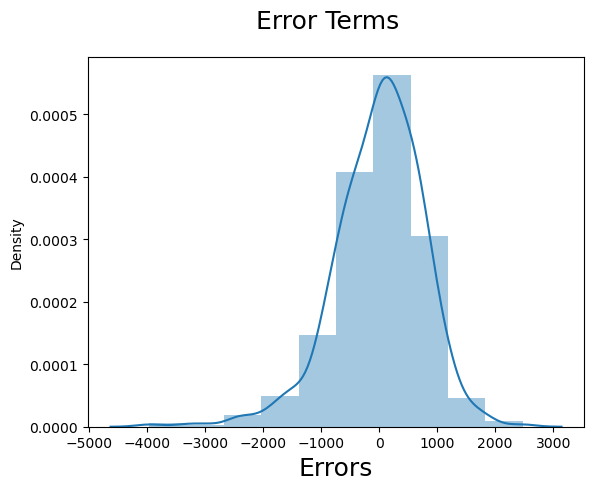

In [131]:
figure = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 10)
figure.suptitle('Error Terms', fontsize = 18)                   
plt.xlabel('Errors', fontsize = 18)

### Prediction using Test Data 

In [133]:
df_bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  219 non-null    int64  
 1   holiday             219 non-null    int64  
 2   workingday          219 non-null    int64  
 3   temp                219 non-null    float64
 4   hum                 219 non-null    float64
 5   windspeed           219 non-null    float64
 6   cnt                 219 non-null    int64  
 7   spring              219 non-null    int32  
 8   summer              219 non-null    int32  
 9   winter              219 non-null    int32  
 10  August              219 non-null    int32  
 11  December            219 non-null    int32  
 12  February            219 non-null    int32  
 13  January             219 non-null    int32  
 14  July                219 non-null    int32  
 15  June                219 non-null    int32  
 16  March       

In [134]:
df_bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
184,0,0,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,1,0
639,1,1,1,24.224153,87.1667,6.999825,4639,0,0,1,...,1,0,0,0,0,0,1,0,0,1
299,0,1,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,1,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,1,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [135]:
## making scaler variables except dummy and yes/no data
test_vars = test_vars = ['temp','hum','windspeed']

#df_bike_test[test_vars] = scaler.fit_transform(df_bike_test[test_vars])

In [136]:
df_bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.954338,0.703196,20.683941,62.346016,13.019974,4471.652968,0.255708,0.269406,0.232877,...,0.091324,0.073059,0.173516,0.109589,0.141553,0.150685,0.159817,0.105023,0.319635,0.031963
std,0.500513,0.209229,0.457896,7.593325,14.429015,4.945792,1853.207583,0.437258,0.444668,0.423633,...,0.288730,0.260830,0.379560,0.313092,0.349389,0.358561,0.367276,0.307285,0.467403,0.176306
min,0.000000,0.000000,0.000000,3.957390,29.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,14.059577,51.604200,9.458725,3235.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,20.431653,61.750000,12.541864,4586.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,27.128327,71.931150,15.792603,5635.500000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,97.250000,28.250014,8227.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
y_test=df_bike_test.pop("cnt")
x_test=df_bike_test

In [138]:
x_test_lr = sm.add_constant(x_test)


### Step 7: Making predictions on the test set

In [140]:
X_train.head()

,yr,temp,windspeed,spring,winter,December,January,July,May,November,September,Cloudy_mist,Light_Rain_Thunder
626,1,22.652500,14.416725,0,0,0,0,0,0,0,1,0,0
363,0,12.778347,9.000579,1,0,1,0,0,0,0,0,0,0
425,1,14.486653,9.708568,1,0,0,0,0,0,0,0,1,0
728,1,10.489153,23.500518,1,0,1,0,0,0,0,0,0,0
482,1,15.443347,8.708325,0,0,0,0,0,0,0,0,1,0


In [141]:
x_test_lr.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
184,1.0,0,0,0,29.793347,63.7917,5.459106,0,0,0,...,0,0,1,0,0,0,0,0,1,0
639,1.0,1,1,1,24.224153,87.1667,6.999825,0,0,1,...,1,0,0,0,0,0,1,0,0,1
299,1.0,0,1,1,19.270000,81.2917,13.250121,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,1.0,0,1,1,31.433347,42.4167,13.417286,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,1,1,29.315000,30.5000,19.583229,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [142]:
X_train.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'winter', 'December', 'January',
       'July', 'May', 'November', 'September', 'Cloudy_mist',
       'Light_Rain_Thunder'],
      dtype='object')

In [143]:
x_test_cols=['yr', 'temp', 'windspeed', 'spring', 'winter', 'December', 'January','July', 'May', 'November', 'September', 'Cloudy_mist','Light_Rain_Thunder']
x_test_sm=x_test_lr[x_test_cols]


In [144]:
X_train.head()

,yr,temp,windspeed,spring,winter,December,January,July,May,November,September,Cloudy_mist,Light_Rain_Thunder
626,1,22.652500,14.416725,0,0,0,0,0,0,0,1,0,0
363,0,12.778347,9.000579,1,0,1,0,0,0,0,0,0,0
425,1,14.486653,9.708568,1,0,0,0,0,0,0,0,1,0
728,1,10.489153,23.500518,1,0,1,0,0,0,0,0,0,0
482,1,15.443347,8.708325,0,0,0,0,0,0,0,0,1,0


In [145]:
x_test_sm.head()

,yr,temp,windspeed,spring,winter,December,January,July,May,November,September,Cloudy_mist,Light_Rain_Thunder
184,0,29.793347,5.459106,0,0,0,0,1,0,0,0,1,0
639,1,24.224153,6.999825,0,1,0,0,0,0,0,0,0,1
299,0,19.270000,13.250121,0,1,0,0,0,0,0,0,1,0
221,0,31.433347,13.417286,0,0,0,0,0,0,0,0,0,0
152,0,29.315000,19.583229,0,0,0,0,0,0,0,0,0,0


In [146]:
x_test_lr = sm.add_constant(x_test_sm)
y_test_pred = lr_md7.predict(x_test_lr)
y_test_pred.head()

184    3961.974345
639    4926.789716
299    3716.017095
221    5141.387112
152    4701.025555
dtype: float64

### **Plot for y_test VS y-test_pred**

Text(0, 0.5, 'y_test_pred')

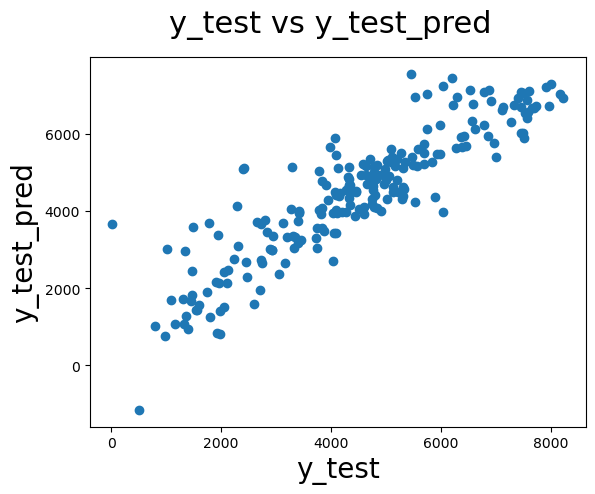

In [148]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 22)               
plt.xlabel('y_test', fontsize = 20)                           
plt.ylabel('y_test_pred', fontsize = 20)

### **Plot for Actual VS Predict values**

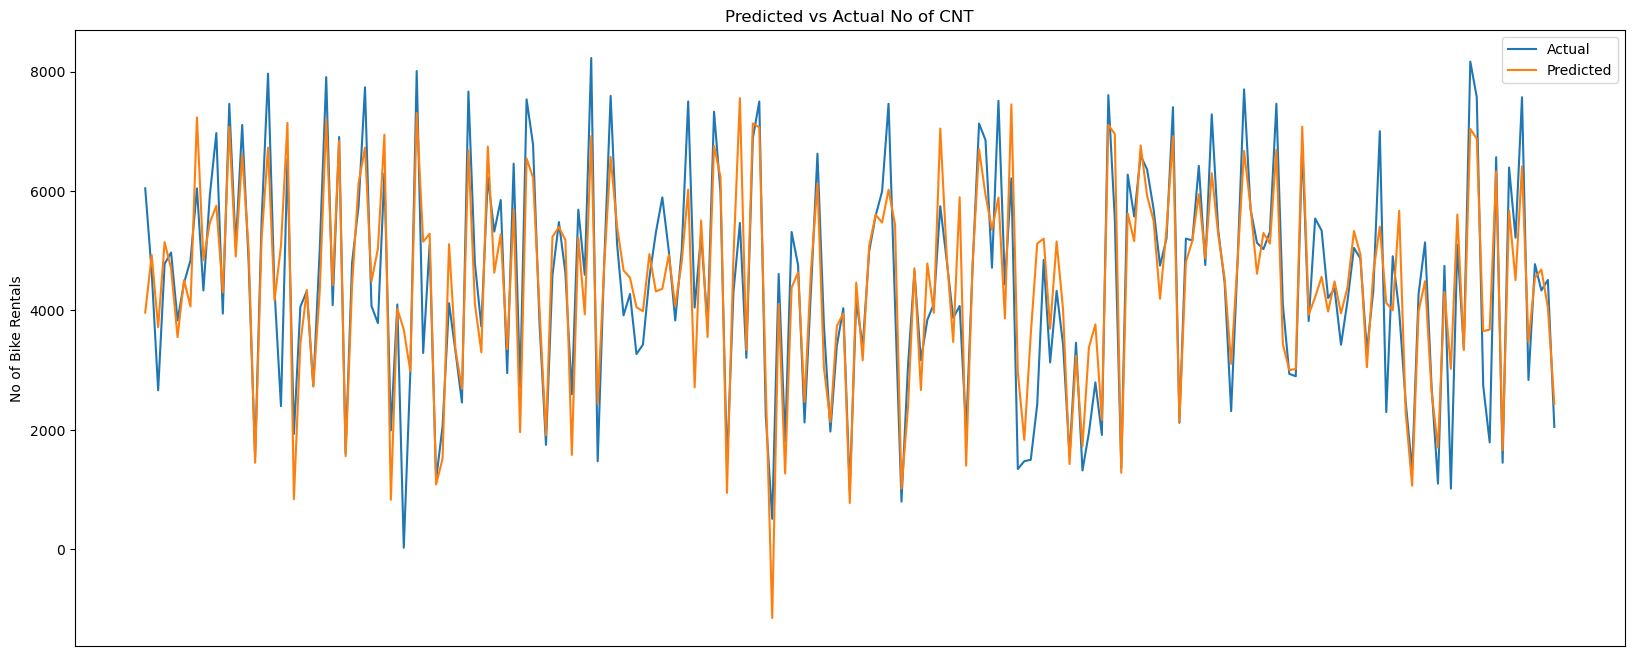

In [150]:
# Plot Actual vs Predicted 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of CNT');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

### **Regression Plot**

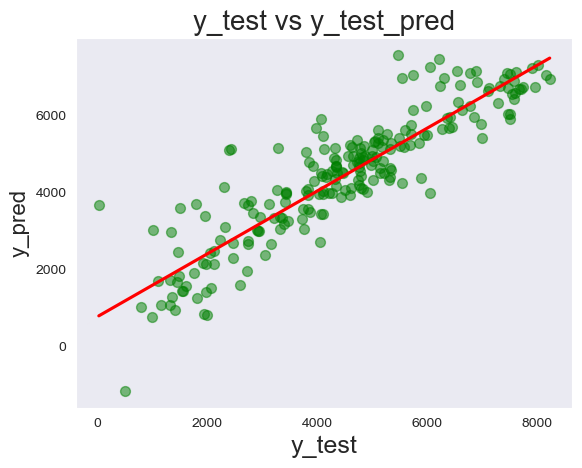

In [152]:
plt.figure()
sns.set_style('dark')
sns.regplot(x=y_test, y=y_test_pred, ci=None, fit_reg=True,scatter_kws={"color": "green","s":50,"alpha":0.5}, robust=True,line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### **_Step: 8 VERIFYING R SQUARED VALUE FOR TRAIN AND TEST DATA_**

In [154]:
mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
rsq_test = r2_score(y_test, y_test_pred)
rsq_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',rsq_train)
print('R-squared for test data:',rsq_test)
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.8456305533230777
R-squared for test data: 0.7993674305256331
Mean Squared Error 828.192


### **_CALCULATE RSQUEARE FOR TEST DATA_**

In [156]:
rsq = r2_score(y_test, y_test_pred)
rsq

0.7993674305256331

In [157]:
lr_md7.params.to_frame().round(2)

,0
const,2279.17
yr,2036.64
temp,106.00
windspeed,-35.00
spring,-940.14
winter,629.84
December,-454.86
January,-408.84
July,-512.36
May,281.73


### **_SUMMARY_**

Dependent Vairable/Constant: cnt 2279.17
Independent Variable/Coefficient:
* yr                 2036.64
* temp 	             106.00
* windspeed 	     -35.00
* spring 	         -940.14
* winter 	         629.84
* December 	         -454.86
* January 	         -408.84
* July 	             -512.36
* May 	             281.73
* November 	         -543.22
* September 	     480.04
* Cloudy_mist 	     -771.77
* Light_Rain_Thunder -2341.55

### **_Regression Equation_**
We can see that the equation of our best fitted line is:

 CNT = 2279.17 + 2036.64 X  yr + 106.00 X temp -35.00 X windspeed -940.14 X Spring +  629.84 X Winter - 454.86 X December  - 408.84 X January - 512.36 X July + 281.73 X May - 543.22 X November + 480.04 X September - 771.77 X Cloudy_mist - 2341.55 X Light_Rain_Thunder 

Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:

Our final multiple linear regression model seeks to predict bike bookings using a collection of predictor factors. 
Following a thorough investigation, we determined the influence of each variable on bike bookings.
The top three  variables that significantly influence bike rent are as follows:
* **_yr_**
* **_temp_**
* **_windspeed_**


For further analysis we should consider the below predictor also:
* **_spring_**
* **_winter_**
* **_December_**
* **_January_**
* **_July_**
* **_May_**
* **_November_**
* **_September_**
* **_Cloudy_mist_**
* **_Light_Rain_Thunder_**